<a href="https://colab.research.google.com/github/shobika814/bigmart-sales/blob/main/fake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Description: True and Fake News Prediction Using Machine Learning

Project Title: True and Fake News Prediction

Objective: To develop a machine learning model capable of accurately classifying news articles as either true (real) or fake. This project aims to enhance the ability to identify misinformation and improve the reliability of information sources

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
train=pd.read_csv('/content/drive/MyDrive/Fake prediction /train.csv')

In [4]:
test=pd.read_csv('/content/drive/MyDrive/Fake prediction /test.csv')

Data Structures And Content




In [5]:
train.shape

(20800, 5)

In [6]:
test.shape

(5200, 4)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [9]:
train.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [10]:
test.isnull().sum()

,0
id,0
title,122
author,503
text,7


In [11]:
test.isnull().sum()

,0
id,0
title,122
author,503
text,7


In [12]:
test.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [13]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Data preprocessing

1.Removeing null values

In [15]:
train=train.fillna('')

In [16]:
test=train.fillna('')

In [17]:
train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [18]:
test.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [19]:
train['subject']=train['author'] + '' + train['title']

In [20]:
train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [21]:
test['subject']=test['author'] + '' + test['title']

In [22]:
test.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


2.tokenization

**Standardization**: Converts text into a consistent format that can be processed by machine learning algorithms.

**Feature** **Extraction**: Facilitates the extraction of meaningful features from the text data.

**Model** **Input**: Prepares text data for conversion into numerical formats that machine learning models can work with.




In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
from nltk.tokenize import word_tokenize
train['tokens']=train['subject'].apply(word_tokenize)
#splits a given sentence into words using the NLTK library.

In [25]:
from nltk.tokenize import word_tokenize
test['tokens']=test['subject'].apply(word_tokenize)
#splits a given sentence into words using the NLTK library.

In [26]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


3.LOWER CASING FOR TEST

Lowercasing text is a common preprocessing step in natural language processing (NLP) and text analysis. It involves converting all the characters in a text dataset to lowercase. This step is crucial for standardizing text data, especially when working with tasks like text classification, sentiment analysis, or any NLP-related project.

In [27]:
train['subject']=train['subject'].str.lower

In [28]:
test['subject']=test['subject'].str.lower

In [29]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,<bound method StringMethods.lower of <pandas.c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,<bound method StringMethods.lower of <pandas.c...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,<bound method StringMethods.lower of <pandas.c...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,<bound method StringMethods.lower of <pandas.c...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,<bound method StringMethods.lower of <pandas.c...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


4.Removal of punctation

Removing punctuation is another common preprocessing step in natural language processing (NLP) and text analysis. It involves eliminating punctuation marks from text data to simplify the text and focus on the actual content, which can improve the performance of various text-based algorithms

In [30]:
train['subject']=train['subject'].str.replace('[^\w\s]','')

In [31]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [32]:
test['subject']=test['subject'].str.replace('[^\w\s]','')

In [33]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,"[Howard, PortnoyIranian, woman, jailed, for, f..."


4.Removal of stopwords

Removing stopwords is another essential preprocessing step in natural language processing (NLP) and text analysis. Stopwords are common words like "and," "the," "is," "in," etc., that usually do not carry significant meaning and can be removed to reduce the dimensionality of the data and focus on the more meaningful words

In [34]:
from nltk.corpus import stopwords

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
SW = set(stopwords.words('english'))
print(SW)
# Showcasing the stopwords in English

{'out', 'between', 'for', 'a', 'being', 'both', "you'll", 'wouldn', 'himself', 'is', 'what', 'as', "it's", 'when', 'few', 'his', 'hasn', 'ain', 'very', 'our', "you've", "weren't", 'here', 'after', 'yourself', 'o', "mustn't", 'mightn', 'are', 'down', 'am', 'myself', 'now', 'was', 'm', 'your', 'can', 'theirs', 'by', 'isn', 'been', 'no', 'all', "hasn't", 'i', 'these', 'because', 'any', 'some', "she's", 'll', 'the', 'she', 'yours', 'once', "wasn't", 'do', 'doing', 'me', "won't", 'into', "you're", 'of', 'other', 'during', 'on', 't', 'should', 'haven', 'in', 'up', 'it', 'why', 'most', 'such', 'has', "should've", 'them', 'yourselves', "you'd", 'under', 'itself', 'while', 'ours', 'more', 'so', 'this', 'over', 'her', 'herself', "that'll", 'aren', 'about', 'to', 'does', 'shan', 'below', 'wasn', "hadn't", 'couldn', 'mustn', 'an', 'against', 'don', "mightn't", "wouldn't", 'hadn', 'be', 'at', 'who', 'further', 's', 'there', 'having', 'nor', 'y', 'have', 'whom', 'from', 'were', "shouldn't", 'had', "

In [37]:
train['subject'] = train['subject'].apply(lambda x: ' '.join(['word for word in x.split() if word not in sw']))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.

In [38]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [39]:
test['subject'] = test['subject'].apply(lambda x: ' '.join(['word for word in x.split() if word not in sw']))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set

In [40]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


5.Open a text box & type as Stemming or lammatization

Definition: Lemmatization is the process of reducing a word to its base or dictionary form, known as the "lemma." Unlike stemming, lemmatization considers the context of the word, using vocabulary and morphological analysis to return the proper base form.

Purpose: The goal is to group different inflected forms of a word together in order to analyze them as a single item. For example, "better" would be reduced to "good," and "running" to "run."

Algorithms: Lemmatization requires a corpus or a dictionary to find the correct base form of a word

In [41]:
from nltk.stem import PorterStemmer

In [42]:
# To apply Stemming or Lemmatization :
stemmer = PorterStemmer()
train['subject'] = train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms


In [43]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [44]:
# To apply Stemming or Lemmatization :
stemmer = PorterStemmer()
test['subject'] = test['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [45]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


6.Vectoritation

Vectorization is the process of converting text or categorical data into numerical form, which can be used as input for machine learning models. It is a crucial step in the preprocessing pipeline, especially for text data, as machine learning algorithms require numerical input to perform calculations.

In [46]:
x=train['subject']
y=train['label']

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
Vt=TfidfVectorizer()
Vt.fit(x)

TfidfVectorizer()

In [49]:
x.head()

,subject
0,word for word in x.split() if word not in sw
1,word for word in x.split() if word not in sw
2,word for word in x.split() if word not in sw
3,word for word in x.split() if word not in sw
4,word for word in x.split() if word not in sw


In [50]:
x=Vt.transform(x)

In [51]:
print(x)

  (0, 6)	0.7071067811865476
  (0, 5)	0.23570226039551587
  (0, 4)	0.23570226039551587
  (0, 3)	0.23570226039551587
  (0, 2)	0.47140452079103173
  (0, 1)	0.23570226039551587
  (0, 0)	0.23570226039551587
  (1, 6)	0.7071067811865476
  (1, 5)	0.23570226039551587
  (1, 4)	0.23570226039551587
  (1, 3)	0.23570226039551587
  (1, 2)	0.47140452079103173
  (1, 1)	0.23570226039551587
  (1, 0)	0.23570226039551587
  (2, 6)	0.7071067811865476
  (2, 5)	0.23570226039551587
  (2, 4)	0.23570226039551587
  (2, 3)	0.23570226039551587
  (2, 2)	0.47140452079103173
  (2, 1)	0.23570226039551587
  (2, 0)	0.23570226039551587
  (3, 6)	0.7071067811865476
  (3, 5)	0.23570226039551587
  (3, 4)	0.23570226039551587
  (3, 3)	0.23570226039551587
  :	:
  (20796, 3)	0.23570226039551587
  (20796, 2)	0.47140452079103173
  (20796, 1)	0.23570226039551587
  (20796, 0)	0.23570226039551587
  (20797, 6)	0.7071067811865476
  (20797, 5)	0.23570226039551587
  (20797, 4)	0.23570226039551587
  (20797, 3)	0.23570226039551587
  (20797, 

In [52]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [53]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [55]:
Modal=LogisticRegression()

In [56]:
Modal.fit(xtrain,ytrain)

LogisticRegression()

In [57]:
ytrpredict=Modal.predict(xtrain)

In [58]:
accuracy =accuracy_score(ytrain,ytrpredict)
precision = precision_score(ytrain, ytrpredict)
recall = recall_score(ytrain, ytrpredict)
f1 = f1_score(ytrain, ytrpredict)

In [59]:
print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)

 Training Accuracy: 0.5006009615384616
 Training Precision: 0.5006009615384616
 Training Recall: 1.0
Training F1 Score: 0.6672006407689227


In [60]:
Yttpredict=Modal.predict(xtest)

In [61]:
accuracy  =accuracy_score(ytest,Yttpredict)
precision = precision_score(ytest, Yttpredict)
recall = recall_score(ytest, Yttpredict)
f1 = f1_score(ytest, Yttpredict)

In [62]:
print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:', f1)

 Testing Accuracy: 0.5007211538461539
 Testing Precision: 0.5007211538461539
 Testing Recall: 1.0
Testing F1 Score: 0.6673073842703828


In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

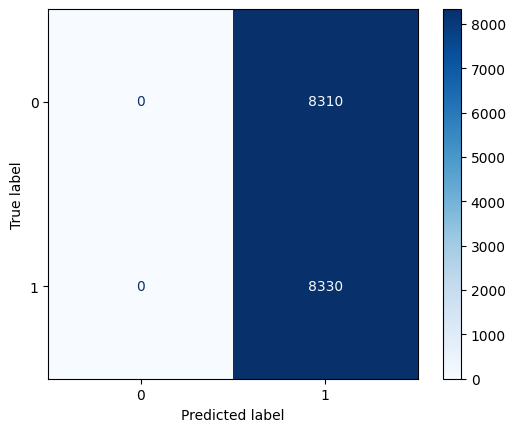

In [64]:
# Generate the confusion matrix
cm = confusion_matrix(ytrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

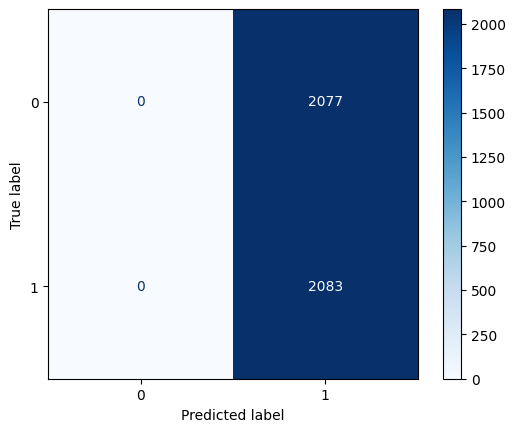

In [65]:
# Generate the confusion matrix
cm = confusion_matrix(ytest,Yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

**Project** **Summary**: True and Fake News Prediction Using Machine Learning

**Objective**: The goal of this project is to build a machine learning model that can accurately predict whether a given news article is true (real) or fake. This is crucial in today's digital age, where misinformation can spread rapidly and have significant societal impacts.

**Data** **Collection**: Datasets: The project typically uses labeled datasets that include examples of both true and fake news articles. Popular datasets for this task include the Fake News Detection dataset or the Kaggle Fake News Challenge dataset. Features: Common features include the text of the article (headline, body), metadata (author, publication date), and possibly social media metrics (shares, likes).

**Data** **Preprocessing**:

**Text** **Cleaning**: Remove HTML tags, special characters, and punctuation. Convert all text to lowercase to ensure uniformity.

**Stopwords** **Removal**: Eliminate common words that do not contribute to the classification task (e.g., "and," "the," "is").

**Tokenization**: Split the text into individual words or tokens.

**Stemming**/**Lemmatization**: Reduce words to their base or root form to consolidate similar words (e.g., "running" → "run").

**Vectorization**: Convert the cleaned and tokenized text into numerical features using techniques like TF-IDF, Bag of Words, or Word Embeddings (e.g., Word2Vec, GloVe).

**Conclusion**: This project aims to build a robust machine learning model capable of distinguishing between true and fake news. By leveraging advanced text preprocessing techniques, feature engineering, and state-of-the-art algorithms, the model can help combat the spread of misinformation, providing a valuable tool for journalists, readers, and social media platforms.

